# Lección # 6
**Nombre:** Pablo Santizo\
**Carné:** 24000134\
**Curso** Ciencia de Datos en Python\
**Maestría:** Data Science\
**Universidad:** Galileo, Instituto en Investigación de Operaciones

# Análisis de Datos con Pandas y Matplotlib

In [233]:
import pandas as pd
import numpy as np

In [234]:
dataset= pd.read_csv("hotel_bookings.csv")
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [235]:
#dimensión de la tabla
dataset.shape

(119390, 32)

In [236]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [237]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Filtros.

In [238]:
dataset['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [239]:
dataset['country'].value_counts()/len(dataset)

country
PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: count, Length: 177, dtype: float64

In [206]:
dataset['country'].isnull().sum() #cantidad total

488

In [207]:
dataset['country'].isnull().mean() #cantidad total

0.004087444509590418

In [208]:
#Casos no nulos
dataset[~dataset['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [209]:
#Casos  nulos
dataset[dataset['country'].isnull()]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,...,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [210]:
~dataset['country'].isnull()

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: country, Length: 119390, dtype: bool

In [211]:
dataset['country'].fillna('ESP',inplace=True)

In [241]:
media = dataset['agent'].mean()
dataset["agent"].fillna(media,inplace=True)

In [242]:
dataset['agent'].isnull().mean() #cantidad total

0.0

In [ ]:
dataset["agent"].dtype=="float64"

In [245]:
#extraemos faltantes de todas las columnas

columnas= dataset.columns
for col in columnas:
    tipo = dataset[col].dtype
    porcentaje_na = dataset[col].isnull().mean()
    if(porcentaje_na<=0.05):
        print(f"{col}:{porcentaje_na}")
        if(tipo=="object"):
            valor_a_imputar =dataset[col].mode()
        else:
            valor_a_imputar= dataset[col].mean()
            
    dataset[col].fillna(valor_a_imputar,inplace=True)

hotel:0.0
is_canceled:0.0
lead_time:0.0
arrival_date_year:0.0
arrival_date_month:0.0
arrival_date_week_number:0.0
arrival_date_day_of_month:0.0
stays_in_weekend_nights:0.0
stays_in_week_nights:0.0
adults:0.0
children:0.0
babies:0.0
meal:0.0
country:0.004087444509590418
market_segment:0.0
distribution_channel:0.0
is_repeated_guest:0.0
previous_cancellations:0.0
previous_bookings_not_canceled:0.0
reserved_room_type:0.0
assigned_room_type:0.0
booking_changes:0.0
deposit_type:0.0
agent:0.0
company:0.0
days_in_waiting_list:0.0
customer_type:0.0
adr:0.0
required_car_parking_spaces:0.0
total_of_special_requests:0.0
reservation_status:0.0
reservation_status_date:0.0


In [246]:
# personas que reservan en Francia y no reservaron con niños o bebes.
dataset[(dataset['country']== "FRA") & (dataset['children']==0) & (dataset['babies']==0) ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,86.693382,110.000000,0,Transient,107.42,0,0,Check-Out,2015-07-02
80,Resort Hotel,0,99,2015,July,27,3,2,7,2,...,No Deposit,40.000000,86.693382,0,Contract,58.95,0,0,Check-Out,2015-07-12
101,Resort Hotel,0,98,2015,July,27,4,2,1,2,...,No Deposit,8.000000,86.693382,0,Transient,71.55,1,0,Check-Out,2015-07-07
127,Resort Hotel,0,100,2015,July,27,4,1,1,2,...,No Deposit,240.000000,86.693382,0,Transient-Party,73.80,1,1,Check-Out,2015-07-06
129,Resort Hotel,0,100,2015,July,27,4,1,1,2,...,No Deposit,240.000000,86.693382,0,Transient-Party,73.80,0,2,Check-Out,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119263,City Hotel,0,115,2017,August,35,28,1,3,2,...,No Deposit,9.000000,86.693382,0,Transient,155.00,0,1,Check-Out,2017-09-01
119286,City Hotel,0,177,2017,August,35,27,2,4,2,...,No Deposit,9.000000,86.693382,0,Transient,175.95,0,1,Check-Out,2017-09-02
119288,City Hotel,0,44,2017,August,35,30,0,3,3,...,No Deposit,9.000000,86.693382,0,Transient,206.33,0,1,Check-Out,2017-09-02
119312,City Hotel,0,4,2017,August,35,31,0,3,2,...,No Deposit,9.000000,86.693382,0,Transient,132.67,0,1,Check-Out,2017-09-03


In [247]:
# personas que reservan en Francia o España y no reservaron con niños o bebes.
dataset[(dataset['country'].isin(["FRA","ESP"])) & (dataset['children']==0) & (dataset['babies']==0) ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,86.693382,110.000000,0,Transient,107.42,0,0,Check-Out,2015-07-02
36,Resort Hotel,0,15,2015,July,27,2,1,3,2,...,No Deposit,240.000000,86.693382,0,Transient,98.00,0,0,Check-Out,2015-07-06
42,Resort Hotel,0,16,2015,July,27,2,2,3,2,...,No Deposit,86.693382,86.693382,0,Transient,123.00,0,0,Check-Out,2015-07-07
46,Resort Hotel,0,96,2015,July,27,2,2,5,2,...,No Deposit,134.000000,86.693382,0,Transient,58.95,0,1,Check-Out,2015-07-09
53,Resort Hotel,0,3,2015,July,27,2,0,1,2,...,No Deposit,240.000000,86.693382,0,Transient,88.20,1,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119288,City Hotel,0,44,2017,August,35,30,0,3,3,...,No Deposit,9.000000,86.693382,0,Transient,206.33,0,1,Check-Out,2017-09-02
119312,City Hotel,0,4,2017,August,35,31,0,3,2,...,No Deposit,9.000000,86.693382,0,Transient,132.67,0,1,Check-Out,2017-09-03
119343,City Hotel,0,149,2017,August,35,30,0,4,2,...,No Deposit,28.000000,86.693382,0,Transient,84.60,0,0,Check-Out,2017-09-03
119346,City Hotel,0,45,2017,August,35,27,2,5,2,...,No Deposit,9.000000,86.693382,0,Transient,183.86,0,2,Check-Out,2017-09-03


In [248]:
dataset['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [249]:
dataset['total_niños'] = dataset['children'] + dataset['babies']

In [250]:
#en promedio cuantos que si llevan niños y bebes cual es el tipo de meal más comun
dataset_ninio_no_0 = dataset[(dataset['children'] + dataset['babies'])>0]
dataset_ninio_no_0['meal'].value_counts(normalize=True)

meal
BB           0.815553
HB           0.148779
SC           0.020566
FB           0.008997
Undefined    0.006105
Name: proportion, dtype: float64

In [251]:
dataset['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [252]:
# paraeel market segment tipo grupo cual es el promedio de adultos que estan en la reserva

In [253]:
dataset[dataset['market_segment']=="Groups"]['adults'].mean()

1.7968805209227197

In [254]:
dataset_groups = dataset[dataset['market_segment']=="Groups"]
dataset_groups['adults'].mean()

1.7968805209227197

In [255]:
dataset['days_in_waiting_list'].mean()

2.321149174972778

In [256]:
# de los primeros 4 paises PTR, GBR, FRA, Cual es el que tiene más dias en waitinglist

In [257]:
dataset[dataset['country'].isin(['PTR','GBR','FRA'])]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_niños
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,86.693382,86.693382,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,86.693382,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,86.693382,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,86.693382,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,86.693382,110.000000,0,Transient,107.42,0,0,Check-Out,2015-07-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119369,City Hotel,0,207,2017,August,34,25,3,7,2,...,14.000000,86.693382,0,Transient,96.25,0,2,Check-Out,2017-09-04,0.0
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,42.000000,86.693382,0,Transient,86.85,0,0,Check-Out,2017-09-04,0.0
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,9.000000,86.693382,0,Transient,155.00,0,1,Check-Out,2017-09-04,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.000000,86.693382,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0


In [258]:
dataset[dataset['country']=='PRT']['days_in_waiting_list'].mean()

4.0540852027166085

In [259]:
dataset[dataset['country']=='GBR']['days_in_waiting_list'].mean()

0.5231263912935938

In [260]:
dataset[dataset['country']=='FRA']['days_in_waiting_list'].mean()

2.3092654824771963

In [261]:
dataset[dataset['country'].isin(['PRT','GBR','FRA'])].groupby(['country'])['days_in_waiting_list'].mean()

country
FRA    2.309265
GBR    0.523126
PRT    4.054085
Name: days_in_waiting_list, dtype: float64

## Escala de Variables

In [262]:
# si el número de datos que puede tomar la variable es menor que 30 es discreta, si es más es continua
continuas = []
discretas = []
categoricas = []

def get_df_variables_scale_type(dataset):
    for col in dataset.columns:
        tipoDato = dataset[col].dtype
        if((tipoDato=='int64') or (tipoDato == 'float64')):
            if(len(dataset[col].unique())> 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [263]:
continuas, discretas, categoricas = get_df_variables_scale_type(dataset)

In [264]:
continuas

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr']

In [265]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_niños
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,92.532992,2.321149,101.831122,0.062518,0.571363,0.111839
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,102.915247,39.389641,17.594721,50.535790,0.245291,0.792798,0.412560
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,86.693382,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,86.693382,0.000000,94.575000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,86.693382,0.000000,126.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


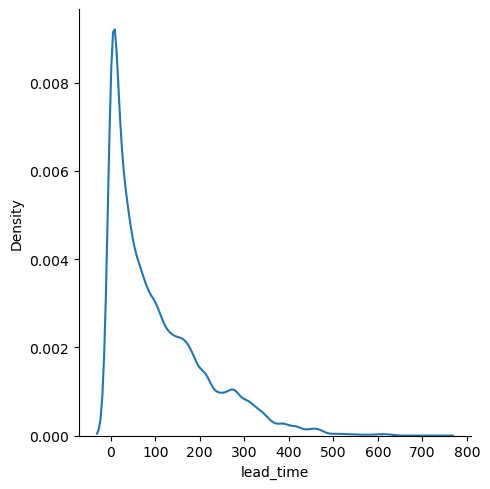

In [267]:
sns.displot(dataset,x='lead_time', kind= 'kde')
plt.show()

lead_time
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


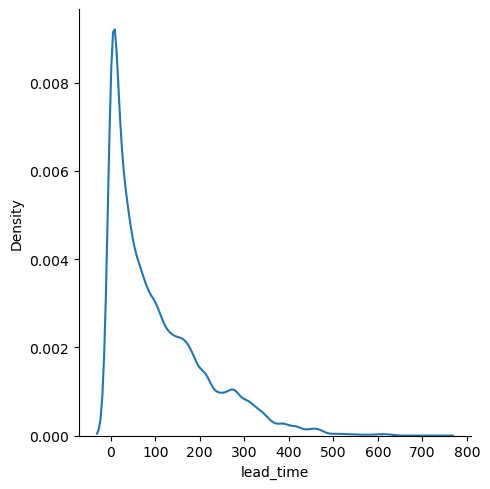

---------------------------------
arrival_date_week_number
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


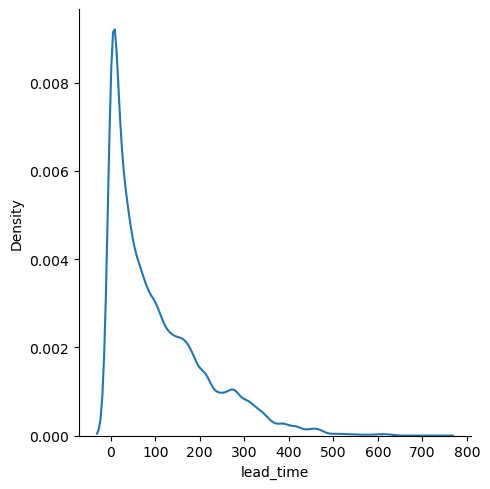

---------------------------------
arrival_date_day_of_month
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


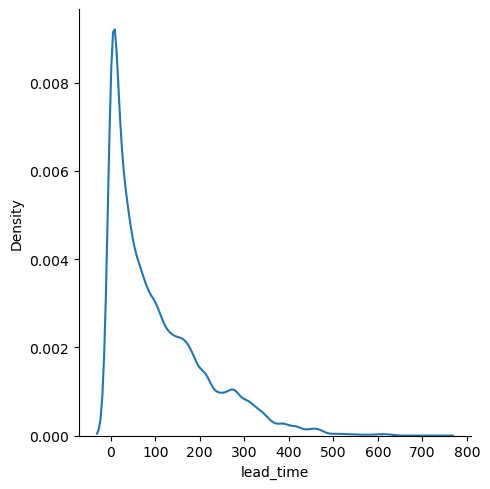

---------------------------------
stays_in_week_nights
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


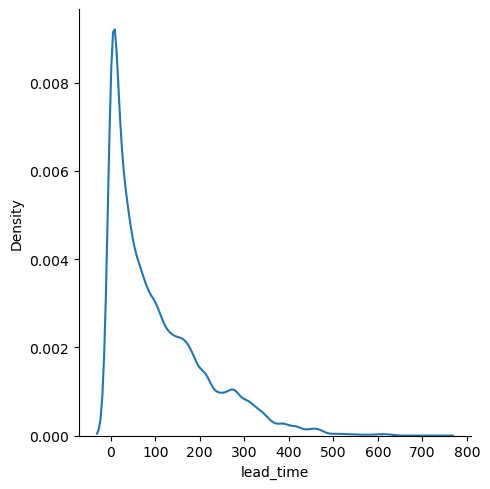

---------------------------------
previous_bookings_not_canceled
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


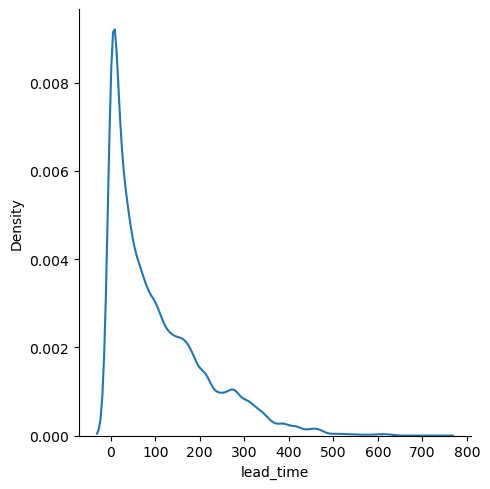

---------------------------------
agent
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


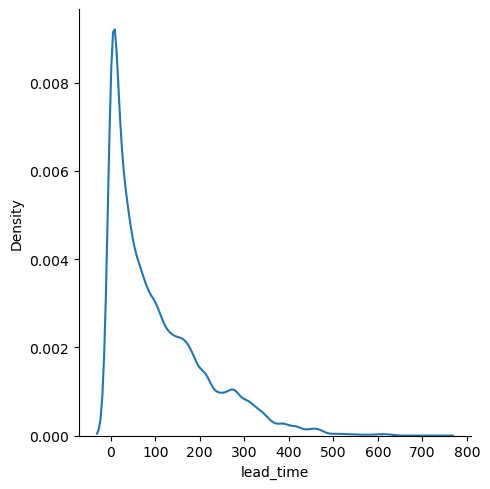

---------------------------------
company
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


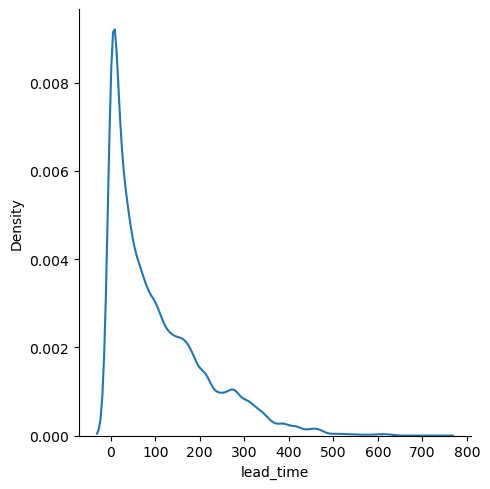

---------------------------------
days_in_waiting_list
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


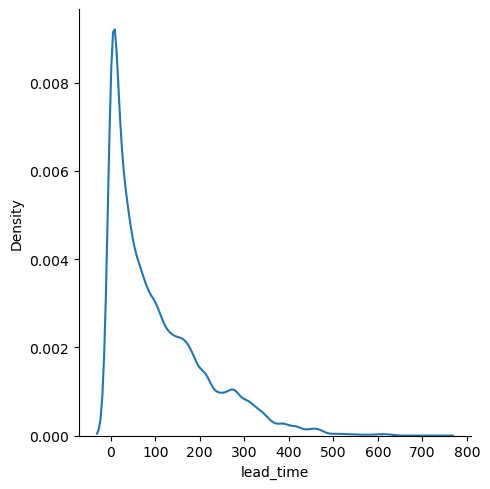

---------------------------------
adr
Mínimo 0.0
Media 104.01141636652986
Mediana 69.0
Máximo 737.0
Desviación 106.86309704798579
Varianza 11419.72151068723


D:\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


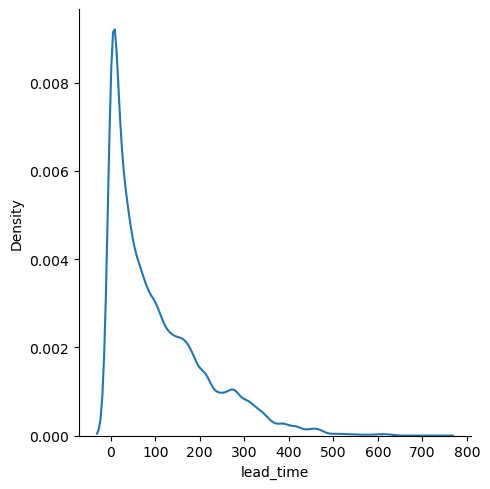

---------------------------------


In [268]:
for col in continuas:
    estadisticos = dataset['lead_time'].describe()
    print(col)
    print('Mínimo', estadisticos['min'])
    print('Media', estadisticos['mean'])
    print('Mediana', estadisticos['50%'])
    print('Máximo', estadisticos['max'])
    print('Desviación', estadisticos['std'])
    print('Varianza', estadisticos['std']**2)
    sns.displot(dataset,x='lead_time', kind= 'kde')
    plt.show()
    print("---------------------------------")


## Agregación

In [272]:
dataset['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [273]:
dataset.groupby('hotel').sum()['adults']

hotel
City Hotel      146838
Resort Hotel     74798
Name: adults, dtype: int64

In [274]:
dataset.groupby(['hotel','meal']).agg(
    media_adultos = ('adults','sum'),
    media_children = ('children','sum'))

media_adultos  media_children
hotel        meal                                    
City Hotel   BB                114987      6515.41556
             FB                    53         0.00000
             HB                 12227       553.00000
             SC                 19571       180.00000
Resort Hotel BB                 55293      3819.00000
             FB                  1510        78.00000
             HB                 15729      1194.00000
             SC                   134         7.00000
             Undefined           2132        57.00000